**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Karen Lizette Rodríguez Hernández
*   MATRÍCULA: A01197734

*   NOMBRE: Marcelo Ismael López Verdugo
*   MATRÍCULA: A00959089

*   NOMBRE: Angel García Ortega
*   MATRÍCULA: A01796653

*   NOMBRE: Juan Carlos Garcés Carrillo
*   MATRÍCULA: A01796283

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import os
DIR = "/content/drive/MyDrive/MNA/1-Trimestre/CienciaDatos/Equipo 29/Semana 7"
os.chdir(DIR)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [35]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [36]:
# Estadísticas descriptivas de variables cuantitativas
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [37]:
# Estadísticas descriptivas de variables cualitativas
cereals_df.describe(include='object')

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

<Axes: xlabel='mfr', ylabel='Count'>

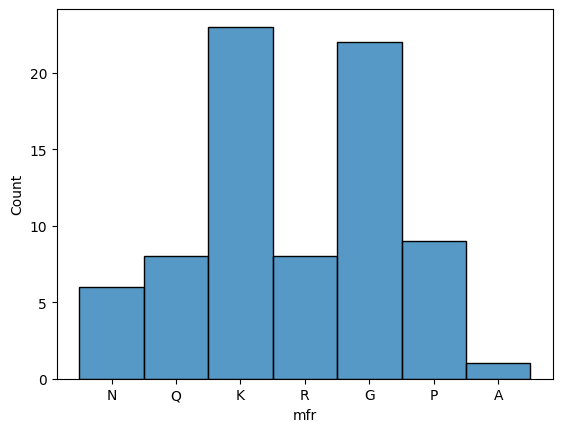

In [38]:
# Histograma de la variable mfr
sns.histplot(data=cereals_df, x='mfr')

In [39]:
# Frecuencia de la variable mfr
cereals_df['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


Se realizó un histograma para visualizar la frecuencia de cada categoría de la variabnle `mfr` y se utilizó el método `value_counts()` para conocer la cantidad exacta. Los resultados son los siguientes:
- K:  23
- G:	22
- P:	9
- Q:	8
- R:	8
- N:	6
- A:	1

<Axes: xlabel='shelf', ylabel='count'>

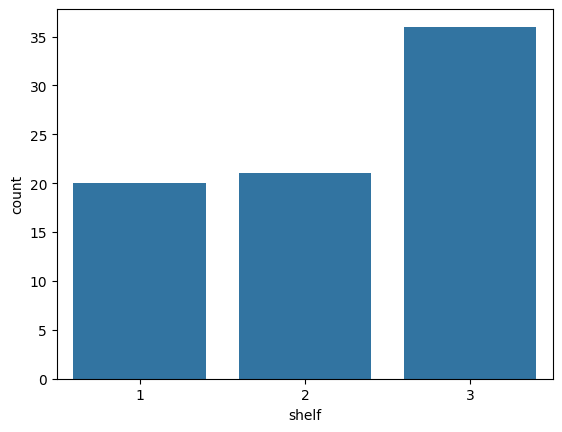

In [40]:
# Gráfica de barras de la variable shelf
sns.countplot(data=cereals_df, x='shelf')

In [41]:
# Frecuencia de la variable shelf
cereals_df['shelf'].value_counts()

,count
shelf,
3,36
2,21
1,20


Se realizó una gráfica de barras para visualizar la frecuencia de cada categoría de la variable `shelf` y se utilizó el método `value_counts()` para conocer la cantidad exacta. Los resultados son los siguientes:
- 1: 20
- 2: 21
- 3: 36

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

<Axes: xlabel='shelf', ylabel='count'>

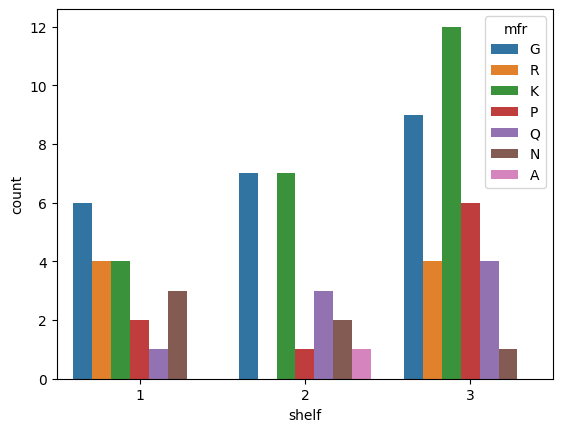

In [42]:
# Gráfica de productos de cada fabricante en cada estante
sns.countplot(data=cereals_df, x='shelf', hue='mfr')

In [43]:
# Productos de cada fabricante en cada estante con pandas
pd.crosstab(cereals_df['mfr'], cereals_df['shelf'])

shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

<Axes: xlabel='rating', ylabel='Count'>

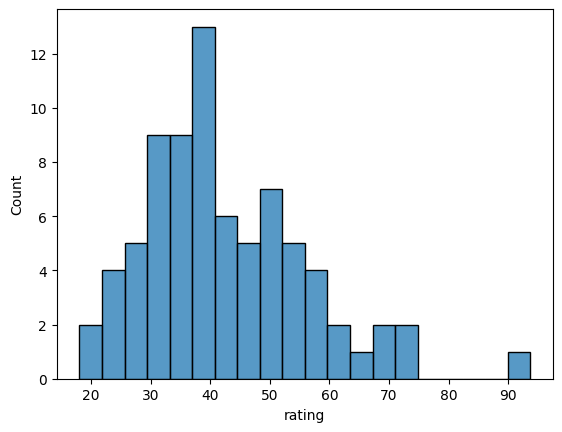

In [44]:
# Histograma de rating
sns.histplot(data=cereals_df, x='rating', bins=20)

Utilizando un histograma, se puede observar que el ranog con mayor frecuencia de la variable `rating` es de 30 - 40.

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

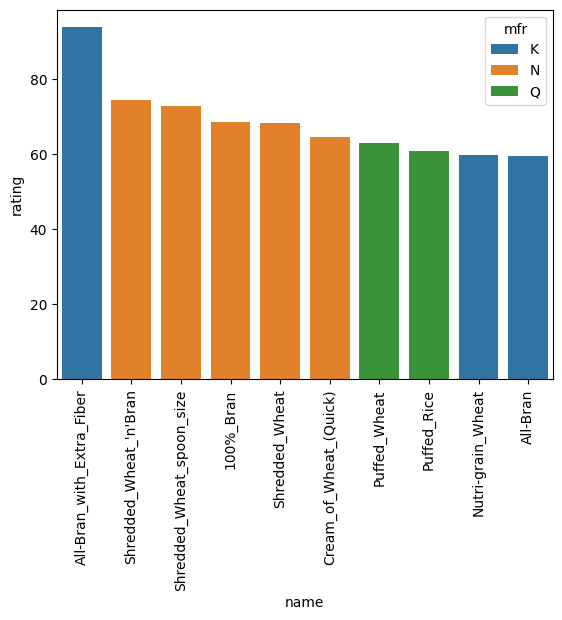

In [45]:
# Gráfica de cereales mejor evaluados con fabricante
sns.barplot(data=cereals_df.sort_values(by='rating', ascending=False).head(10), x='name', y='rating', hue='mfr')
plt.xticks(rotation=90)
plt.show()

In [46]:
# Cereales mejor evaluados con fabricante
cereals_df.sort_values(by='rating', ascending=False).head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
64,Shredded_Wheat_'n'Bran,N,C,90,3,0,0,4.0,19.0,0.0,140.0,0,1,1.00,0.67,74.472949
65,Shredded_Wheat_spoon_size,N,C,90,3,0,0,3.0,20.0,0.0,120.0,0,1,1.00,0.67,72.801787
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
63,Shredded_Wheat,N,C,80,2,0,0,3.0,16.0,0.0,95.0,0,1,0.83,1.00,68.235885
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.00,1.00,64.533816
55,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50.0,0,3,0.50,1.00,63.005645
54,Puffed_Rice,Q,C,50,1,0,0,0.0,13.0,0.0,15.0,0,3,0.50,1.00,60.756112
50,Nutri-grain_Wheat,K,C,90,3,0,170,3.0,18.0,2.0,90.0,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505


Se realizo una gráfica de barras con los 10 cereales mejor rankeados (dependiendo de la variable `ranking`), dependiendo de su color, es el fabricante de cada cereal. Se confirmó esta información utilizando el método de `sort_values()` y `head()` para conocer solamente los primeros 10.

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

<Axes: xlabel='mfr', ylabel='calories'>

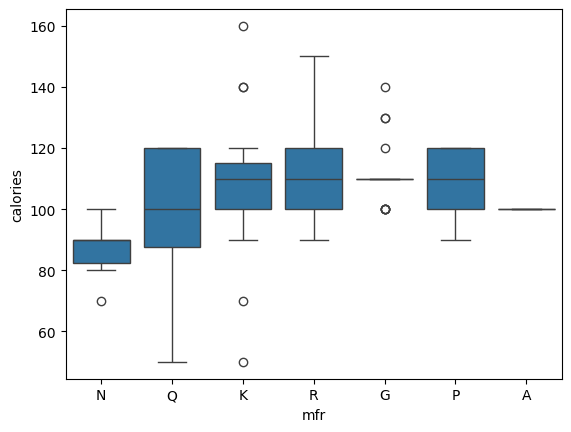

In [47]:
# Distribución de calorias segun fabricante
sns.boxplot(data=cereals_df, x='mfr', y='calories')

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

<Axes: >

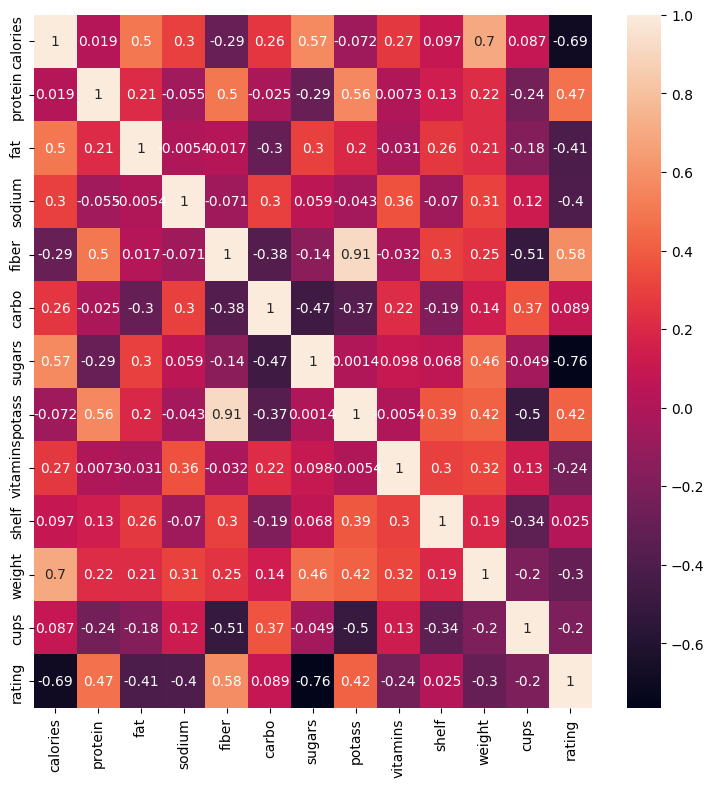

In [48]:
# Mapa de calor de correlaciones
cereals_df_num = cereals_df.select_dtypes(include=np.number)
plt.figure(figsize=(9,9))
sns.heatmap(cereals_df_num.corr(), annot=True)

Las dos variables con mayor correlación con la variable `rating` es `sugars` con -0.76 y `calories` con -0.69

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [49]:
# Eliminar registros con datos faltantes y reiniciar el índice
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [50]:
# Guardar rating en y, valores numéricos en X
x = cereals_df.drop(columns=['rating','shelf'])
y = cereals_df['rating']
x=x.select_dtypes(include=[np.number])

Se elimina shelf de las variables numéricas predictoras, ya que es una variable categórica ordinal.

In [51]:
# Escalar valores de x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=scaler.get_feature_names_out())
x_scaled

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,-0.202203,-2.099895
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,-0.202203,0.761919
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,-0.202203,-2.099895
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,-0.202203,-1.373763
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-0.202203,-0.305922
...,...,...,...,...,...,...,...,...,...,...,...
69,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,-0.948852,-0.547081,-0.183083,-0.202203,-0.305922
70,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.129883,-1.044254,-0.183083,-0.202203,0.761919
71,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,-0.948852,0.234189,-0.183083,-0.202203,-0.647631
72,-0.356533,0.455295,0.0,0.457800,0.342475,0.587348,-0.948852,0.163165,-0.183083,-0.202203,0.761919


In [52]:
# Aplicar PCA
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected, columns=[f'{x_scaled.columns[i]}' for i in range(x_projected.shape[1])])
x_projected

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,5.041308,-2.470097,-0.054581,-1.129434,0.667588,0.640401,-0.022399,0.059205,-0.026325,-0.250917,0.021692
1,1.503568,0.310316,-3.014154,3.202758,1.344651,0.066992,0.396573,-1.228817,0.594837,-0.042521,-0.096381
2,4.866598,-1.946814,0.869813,-1.225550,0.358265,1.832924,0.232872,0.017511,-0.116766,0.493001,-0.031211
3,5.468886,-3.899001,1.883856,-1.628993,0.601691,0.374002,0.811525,-1.003853,-0.063792,-0.720550,0.101563
4,0.088378,0.391583,-1.490079,0.054716,0.331903,0.848360,-0.271351,0.033091,0.183945,-0.169367,-0.050918
...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,0.260808,1.160446,0.531351,-1.053122,0.817503,-0.665223,-0.280993,-0.054940,0.344181,0.089951
70,-1.634842,0.417530,-1.672206,-0.593553,0.134293,-0.082682,0.257906,-0.161360,0.099496,-0.099663,0.098120
71,0.389697,-0.475626,1.182007,0.334499,-0.494861,0.820825,-0.328101,0.005608,-0.045088,0.031525,0.078019
72,-0.172304,-0.491070,1.163945,0.580625,0.146570,0.290806,0.627485,-0.334248,0.067364,-0.084460,0.047027


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

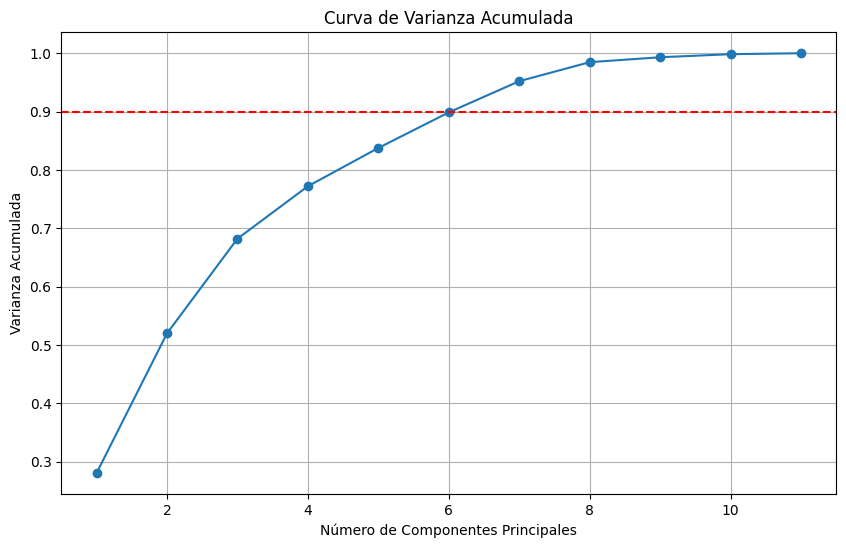

In [53]:
# Curva de porcentaje de varianza acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Curva de Varianza Acumulada')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [54]:
n_components_90 = np.argmax(cumulative_variance_ratio > 0.90)+1
print(f"Número mínimo de componentes principales para explicar mas del 90% de la varianza: {n_components_90}")

Número mínimo de componentes principales para explicar mas del 90% de la varianza: 7


Con 6 componentes, se obtiene el 90% de varianza. Sin embargo, son necesario **7** componentes para que la varianza acumulada sea **mayor a 90%**

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


[-0.01040615  0.35678238  0.19027226 -0.06472068  0.49998564 -0.29577872
  0.05873503  0.531454   -0.03734692  0.23742301 -0.38868677]


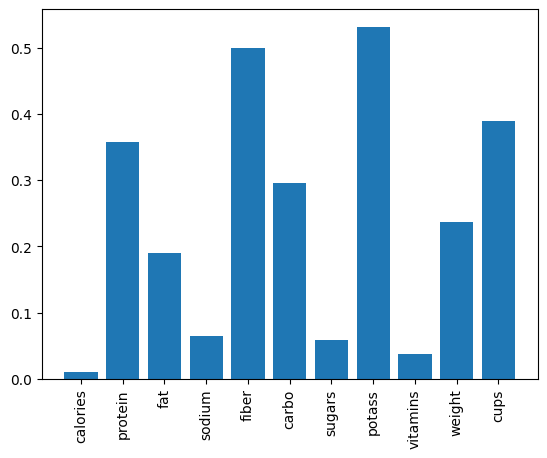

In [55]:
# Gráfica de barras del primer componente
print(pca.components_[0])
plt.bar(x_scaled.columns, np.abs(pca.components_[0]))
plt.xticks(rotation=90)
plt.show()

Las variables con más inportancia en el cálculo del primer componente es `potass`, `fiber` y `cups`

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

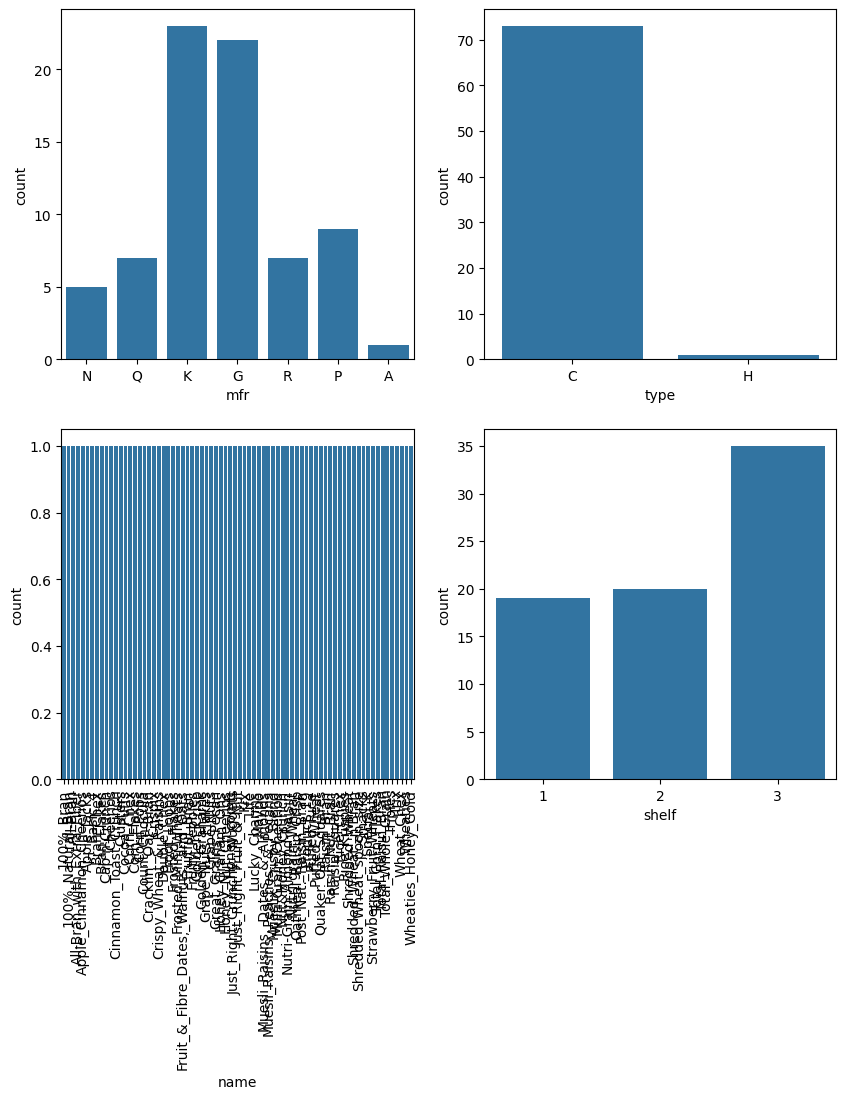

In [56]:
# Gráfica de frecuencia de valores de variables categóricas
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=cereals_df, x='mfr')
plt.subplot(2, 2, 2)
sns.countplot(data=cereals_df, x='type')
plt.subplot(2, 2, 3)
sns.countplot(data=cereals_df, x='name')
plt.xticks(rotation=90)
plt.subplot(2, 2, 4)
sns.countplot(data=cereals_df, x='shelf')
plt.show()

In [57]:
# Frecuencia de valores de variables categóricas
print(f"{cereals_df['mfr'].value_counts()} \n")
print(f"{cereals_df['type'].value_counts()} \n")
print(f"{cereals_df['name'].value_counts()} \n")
print(f"{cereals_df['shelf'].value_counts()} \n")

mfr
K    23
G    22
P     9
Q     7
R     7
N     5
A     1
Name: count, dtype: int64 

type
C    73
H     1
Name: count, dtype: int64 

name
100%_Bran              1
Raisin_Bran            1
Puffed_Wheat           1
Puffed_Rice            1
Product_19             1
                      ..
Frosted_Mini-Wheats    1
Frosted_Flakes         1
Froot_Loops            1
Double_Chex            1
Wheaties_Honey_Gold    1
Name: count, Length: 74, dtype: int64 

shelf
3    35
2    20
1    19
Name: count, dtype: int64 



Al observar la frecuencia con las gráficas de barras y con el método de `value_counts` en las variables categóricas, podemos identificar lo siguiente:
- La variable `name` es única para cada registro, es como un identificador, por lo que no es una variable predictora.
- En la variable `type` todos los registros tienen el mismo valor, excepto uno, por lo que no es una variable predictora.
- Las variables `mfr` y `shelf` tienen una variación de frecuencia para cada valor, por lo que si son variables predictoras.

La variable `shelf` es de tipo categórica ordinal y ya tiene valores numéricos del 1-3 por lo que no es necesario aplicar algún método.

Para la variable `mfr` es necesario aplicar el método One-Hot Encoding, ya que es una variable categórica nominal y no tiene alta cardinalidad.

In [58]:
# Aplicar One-Hot Encoding a mfr
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_df = pd.DataFrame(encoder.fit_transform(cereals_df[['mfr']]))
onehot_df.columns = encoder.get_feature_names_out()
onehot_df

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0
70,1.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0
72,1.0,0.0,0.0,0.0,0.0,0.0


Observando las estadísticas descripticas del punto 1, podemos identificar que la variable que puede ser predictora es `mfr` y `type`y `shelf` la única variable que no se puede utilizar es `name` ya que hay un valor único en cada registro.

Se utilizó el método One-Hot Encoding para las variables `mfr` y `type` ya que son categóricas y no tiene alta cardinalidad. La variable `shelf` es una variable categórica ordinal y ya tiene valores numéricos del 1-3 por lo que no es necesario aplicar algún método.

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [59]:
# Dataframe final
df_final = pd.concat([x_projected.iloc[:, :7], onehot_df, cereals_df['shelf'], y], axis=1)
df_final

,calories,protein,fat,sodium,fiber,carbo,sugars,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf,rating
0,5.041308,-2.470097,-0.054581,-1.129434,0.667588,0.640401,-0.022399,0.0,0.0,1.0,0.0,0.0,0.0,3,68.402973
1,1.503568,0.310316,-3.014154,3.202758,1.344651,0.066992,0.396573,0.0,0.0,0.0,0.0,1.0,0.0,3,33.983679
2,4.866598,-1.946814,0.869813,-1.225550,0.358265,1.832924,0.232872,0.0,1.0,0.0,0.0,0.0,0.0,3,59.425505
3,5.468886,-3.899001,1.883856,-1.628993,0.601691,0.374002,0.811525,0.0,1.0,0.0,0.0,0.0,0.0,3,93.704912
4,0.088378,0.391583,-1.490079,0.054716,0.331903,0.848360,-0.271351,1.0,0.0,0.0,0.0,0.0,0.0,1,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,0.260808,1.160446,0.531351,-1.053122,0.817503,-0.665223,1.0,0.0,0.0,0.0,0.0,0.0,3,39.106174
70,-1.634842,0.417530,-1.672206,-0.593553,0.134293,-0.082682,0.257906,1.0,0.0,0.0,0.0,0.0,0.0,2,27.753301
71,0.389697,-0.475626,1.182007,0.334499,-0.494861,0.820825,-0.328101,0.0,0.0,0.0,0.0,0.0,1.0,1,49.787445
72,-0.172304,-0.491070,1.163945,0.580625,0.146570,0.290806,0.627485,1.0,0.0,0.0,0.0,0.0,0.0,1,51.592193


In [60]:
# Escribir dataframe final a un archivo
df_final.to_csv('cereals_pca.csv', index=False)